In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as pt
import pickle # it is used to deal with file
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from google.colab.patches import cv2_imshow
from tqdm import tqdm
import time
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dir = '/content/drive/Shareddrives/Data/Facial Emotion Detection/emotion/train'
categories = ['angry','happy','neutral','sad','surprise']
data = []
for category in tqdm(categories):
    path=os.path.join(dir,category) # It join category which is cat and dog in  path
    label = categories.index(category) # it give label of categories i.e 1 and 0
    

    for pic in os.listdir(path):
        imgpath = os.path.join(path,pic) # it gives path of image
        img = cv2.imread(imgpath,0)
        try:
           img = cv2.resize(img,(150,150))
           image = np.array(img).flatten() # conversion of 2D array in 1D
           data.append([image,label])  # 9
        except Exception as e:
            pass

       
    
file = open('data2.pickle','wb')
pickle.dump(data,file)
file.close
cv2.waitKey(0)
cv2.destroyAllWindows()

100%|██████████| 5/5 [08:38<00:00, 103.65s/it]


In [3]:
file = open('/content/data2.pickle','rb')
data = pickle.load(file)
file.close

<function BufferedReader.close>

In [4]:
random.shuffle(data)
features=[]
labels = []

for feature,label in data:
    features.append(feature)
    labels.append(label)

xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size=0.20)
# creating Model
model = DecisionTreeClassifier(criterion='entropy')
from sklearn.model_selection import GridSearchCV
#     ...............Optimizing..........................
# params = {
#     'max_depth': [2,3,5,10,20],
#     'min_samples_leaf': [5,10,20,50,100,200],
#     'n_estimators': [10,25,30,50,100,200]
# }
# model = GridSearchCV(estimator=model,
#                            param_grid=params,
#                            cv = 4,
#                            n_jobs=-1, verbose=1, scoring="accuracy")

# model = KNeighborsClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

accuracy :  0.20489611191112939
prediction is :  neutral


<function matplotlib.pyplot.show>

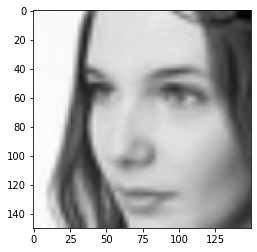

In [20]:
random.shuffle(xtest)

predict = model.predict(xtest)
accuracy = model.score(xtest, ytest)
categories = ['angry','happy','neutral','sad','surprise']
print('accuracy : ', accuracy)
print('prediction is : ',categories[predict[0]])
mypet = xtest[0].reshape(150,150)
pt.imshow(mypet, cmap= 'gray')
pt.show